# **Mcdonals Indian Menu**

**Importing Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Loading Dataset**

In [3]:
df = pd.read_csv('/content/India_Menu.csv')
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


# **Data Cleaning**

**Checking Missing Values**

In [4]:
df.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

**Datatypes**

In [5]:
df.dtypes

Menu Category              object
Menu Items                 object
Per Serve Size             object
Energy (kCal)             float64
Protein (g)               float64
Total fat (g)             float64
Sat Fat (g)               float64
Trans fat (g)             float64
Cholesterols (mg)         float64
Total carbohydrate (g)    float64
Total Sugars (g)          float64
Added Sugars (g)          float64
Sodium (mg)               float64
dtype: object

In [6]:
df.columns

Index(['Menu Category', 'Menu Items', 'Per Serve Size', 'Energy (kCal)',
       'Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)'],
      dtype='object')

# **EDA**

**1) What is the distribution of energy content (kCal) across menu items?**

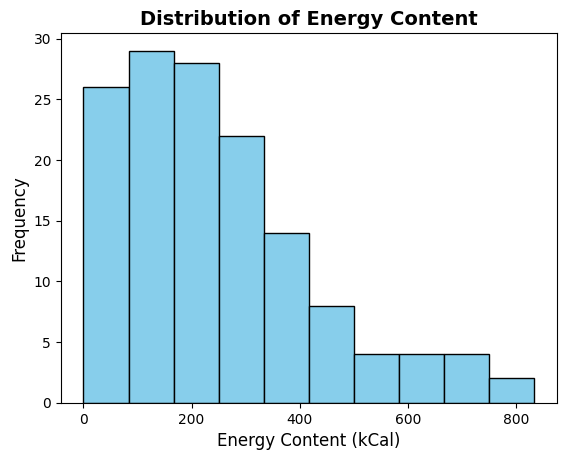

In [7]:
plt.hist(df['Energy (kCal)'], bins=10, edgecolor='black', color='skyblue')

plt.xlabel('Energy Content (kCal)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Energy Content', fontsize=14, fontweight='bold')

plt.show()

X-Axis (Energy Content): The X-axis represents the energy content in kilocalories (kCal). It is divided into bins or intervals that group similar values together. In this example, I used 10 bins.

Y-Axis (Frequency): The Y-axis represents the frequency or count of menu items falling into each energy content bin. It indicates how many menu items have energy content within a particular range.

Bar Heights: The height of each bar in the histogram represents the frequency of menu items within the corresponding energy content bin. Taller bars indicate a higher frequency of menu items with energy content in that range.

Distribution: By observing the histogram, you can interpret the distribution of energy content. It provides information about the concentration or spread of energy values. For example, if the histogram shows a single peak or bell-shaped curve, it suggests that most menu items have energy content clustered around a particular range. On the other hand, if the histogram shows multiple peaks or a wider distribution, it indicates variability in energy content across different menu items.

**2) Which menu items have the highest total fat (g) content?**

In [8]:
sorted_df = df.sort_values('Total fat (g)')

top_10_menu_items = sorted_df['Menu Items'].tail(10)
top_10_total_fat = sorted_df['Total fat (g)'].tail(10)

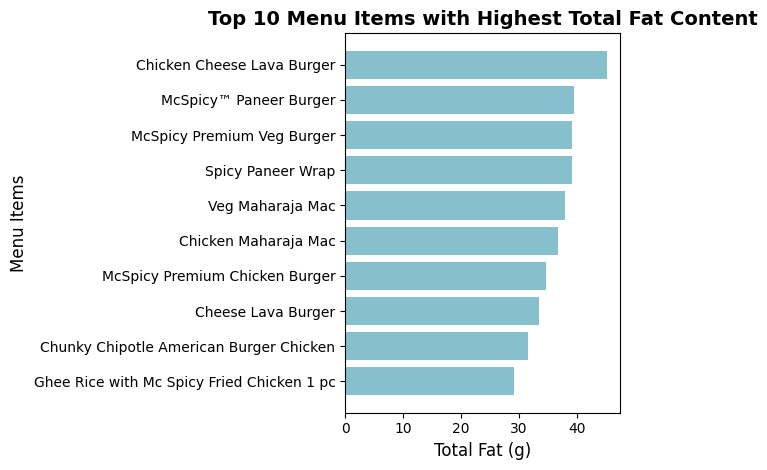

In [9]:
plt.barh(top_10_menu_items, top_10_total_fat, color='#87c0cd')

plt.xlabel('Total Fat (g)', fontsize=12)
plt.ylabel('Menu Items', fontsize=12)
plt.title('Top 10 Menu Items with Highest Total Fat Content', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


**3) What is the relationship between total carbohydrate (g) and total sugars (g)?**

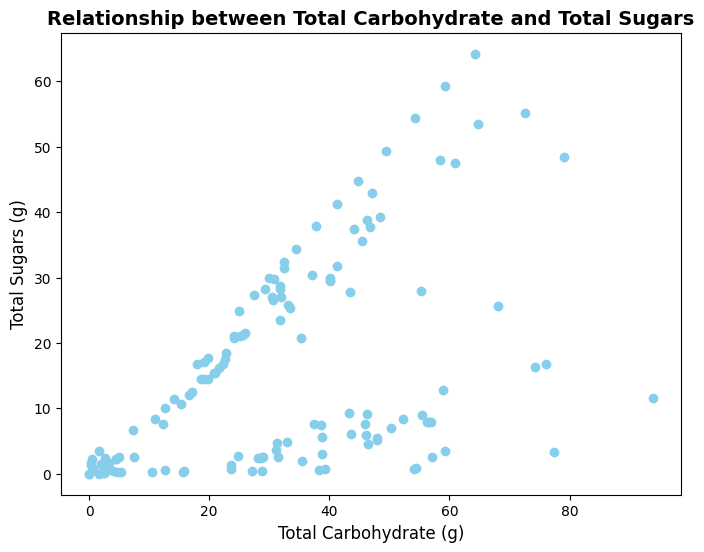

In [25]:
carb_sugar_df = df[['Total carbohydrate (g)', 'Total Sugars (g)']]

plt.figure(figsize=(8, 6))

plt.scatter(carb_sugar_df['Total carbohydrate (g)'], carb_sugar_df['Total Sugars (g)'], color='skyblue')

plt.xlabel('Total Carbohydrate (g)', fontsize=12)
plt.ylabel('Total Sugars (g)', fontsize=12)
plt.title('Relationship between Total Carbohydrate and Total Sugars', fontsize=14, fontweight='bold')

plt.show()

**4) Top 5 unhealthiest meals**

In [13]:
df['Unhealthiness Score'] = df['Energy (kCal)'] * 0.5 + df['Total fat (g)'] * 0.3 + df['Sodium (mg)'] * 0.2
df = df.sort_values('Unhealthiness Score', ascending=False)


In [14]:
top_5_unhealthiest = df.head(5)

<ipython-input-26-c4701901997b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(x_labels)


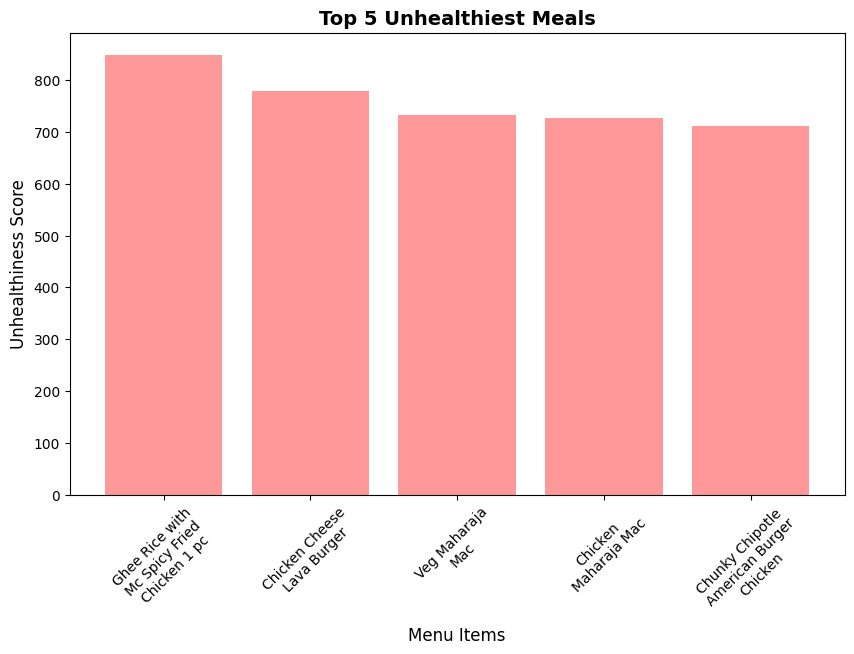

In [26]:
import textwrap

plt.figure(figsize=(10, 6))

plt.bar(top_5_unhealthiest['Menu Items'], top_5_unhealthiest['Unhealthiness Score'], color="#FF9999")
plt.xlabel('Menu Items', fontsize=12)
plt.ylabel('Unhealthiness Score', fontsize=12)
plt.title('Top 5 Unhealthiest Meals', fontsize=14, fontweight='bold')

x_labels = [textwrap.fill(label, 15) for label in top_5_unhealthiest['Menu Items']]
plt.gca().set_xticklabels(x_labels)

plt.xticks(rotation=45)
plt.show()

**5) Distribution of protein content across different menu items**

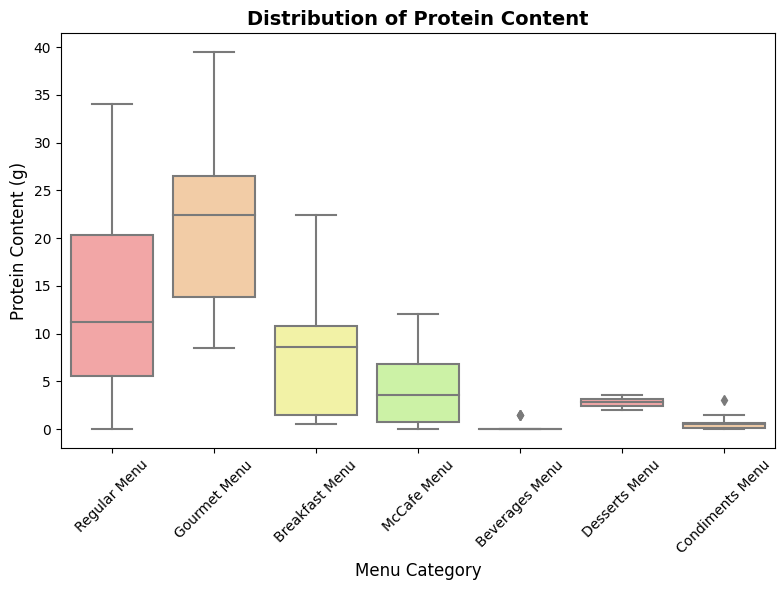

In [24]:
import seaborn as sns

plt.figure(figsize=(8, 6))

colors = ["#FF9999", "#FFCC99", "#FFFF99", "#CCFF99", "#99FF99"]

sns.boxplot(x='Menu Category', y='Protein (g)', data=df, palette=colors)

plt.xlabel('Menu Category', fontsize=12)
plt.ylabel('Protein Content (g)', fontsize=12)
plt.title('Distribution of Protein Content', fontsize=14, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The boxplot provides a summary of the protein content distribution across different menu categories in the dataset. The boxplot reveals that the protein content varies across the menu categories, with some categories showing a wider range and greater variability than others. The median protein content varies between the categories, indicating differences in the average protein levels. The boxes in the plot indicate the interquartile range (IQR) of the protein content distribution within each category, with the whiskers representing the data range. The presence of outliers suggests the presence of menu items with exceptionally high or low protein content. Overall, the boxplot allows for a quick visual comparison of the protein content distributions, providing insights into the variation and range of protein levels in the different menu categories.